<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/nasjonal_vannskadeerstatning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vannskadeerstatning
Et par plott over data fra Finans Norge. Tall er hentet fra grafer kun for å plotte trend

In [11]:
import numpy as np 
# Ca tall for vannskadeerstatning i millioner fra Finans Norge
data = np.array([870,800,1400,950,1400,1300,1200,1580,1200,1260,1610])
year = np.arange(2009,2030,1)

In [22]:
len(year[:-11])
len(data)

11

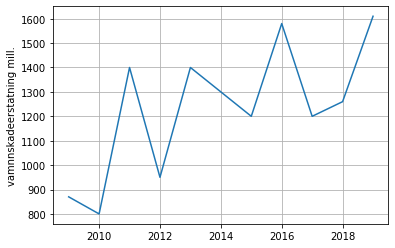

([<matplotlib.lines.Line2D at 0x7f690139a4a8>], None, None)

In [23]:
import matplotlib.pyplot as plt

plt.ylabel("vamnnskadeerstatning mill.")
plt.plot(year[:-10], data), plt.grid(), plt.show()

Enkel lineær regresjon

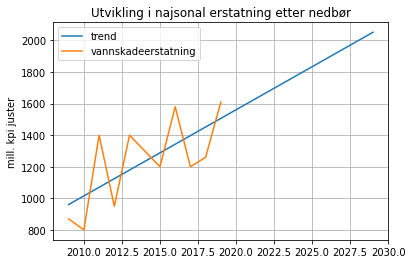

(None, <matplotlib.legend.Legend at 0x7f69011a9978>, None)

In [30]:
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det


x = data
a,b = linreg(range(len(x)),x)  #//your x,y are switched from standard notation
extrapolatedtrendline=[a*index + b for index in range(len(year))] #20 is years, change after desire.

plt.plot(year,extrapolatedtrendline,label="trend")
plt.plot(year[:-10],data,label="vannskadeerstatning")
plt.title("Utvikling i najsonal erstatning etter nedbør")
plt.ylabel("mill. kpi juster")
plt.grid(),plt.legend(), plt.show()